Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock, Germany

# Tutorial Digital Signal Processing

**Correlation**,
Winter Semester 2020/21 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

WIP...

In [1]:
# most common used packages for DSP, have a look into other scipy submodules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal


def my_xcorr2(x, y, scaleopt='none'):
    N = len(x)
    M = len(y)
    kappa = np.arange(0, N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    if N == M:
        if scaleopt == 'none' or scaleopt == 'raw':
            ccf /= 1
        elif scaleopt == 'biased' or scaleopt == 'bias':
            ccf /= N
        elif scaleopt == 'unbiased' or scaleopt == 'unbias':
            ccf /= (N - np.abs(kappa))
        elif scaleopt == 'coeff' or scaleopt == 'normalized':
            ccf /= np.sqrt(np.sum(x**2) * np.sum(y**2))
        else:
            print('scaleopt unknown: we leave output unnormalized')
    return kappa, ccf

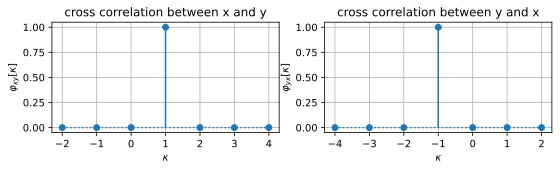

In [2]:
if True:  # test my_xcorr with simple example
    x = np.array([0, 1, 0, 0, 0])
    y = np.array([1, 0, 0])
    # plot my_xcorr2(x, y) vs. my_xcorr2(y, x)
    plt.figure(figsize=(9, 2))
    plt.subplot(1, 2, 1)
    kappa_xy, ccf_xy = my_xcorr2(x, y)  
    plt.stem(kappa_xy, ccf_xy, basefmt='C0:', use_line_collection=True)
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{xy}[\kappa]$')
    plt.title('cross correlation between x and y')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    kappa_yx, ccf_yx = my_xcorr2(y, x)
    plt.stem(kappa_yx, ccf_yx, basefmt='C0:', use_line_collection=True)
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\varphi_{yx}[\kappa]$')
    plt.title('cross correlation between y and x')
    plt.grid(True)

## Normalization schemes for cross correlation of finite length signals

check cross correlation
- of a cosine and a sine signal
- of a normal pdf process that exhibits some repetition

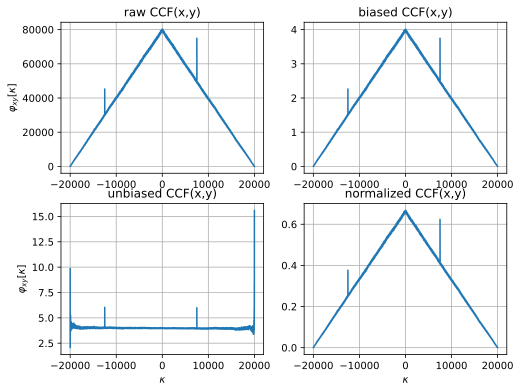

In [3]:
case_str = 'cos_sin'
case_str = 'normal_pdf'

if case_str == 'cos_sin':
    Nt = 200  # number of samples for a full period 
    x = np.cos(2*np.pi/Nt * 1 * np.arange(0, Nt)) * 2
    y = np.sin(2*np.pi/Nt * 1 * np.arange(0, Nt)) * 2
elif case_str == 'normal_pdf':
    Nt = 20000
    loc, scale = 2, np.sqrt(2)  # mu, sigma
    x = scale * np.random.randn(Nt) + loc
    y = np.roll(x,-7500)  # process similarity for offset of 7500 samples

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
kappa, ccf = my_xcorr2(x, y, scaleopt='none')
plt.plot(kappa, ccf)
plt.ylabel(r'$\varphi_{xy}[\kappa]$')
plt.title('raw CCF(x,y)')
plt.grid(True)

plt.subplot(2,2,2)
kappa, ccf = my_xcorr2(x, y, scaleopt='biased')
plt.plot(kappa, ccf)
plt.title('biased CCF(x,y)')
plt.grid(True)

plt.subplot(2,2,3)
kappa, ccf = my_xcorr2(x, y, scaleopt='unbiased')
plt.plot(kappa, ccf)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\varphi_{xy}[\kappa]$')
plt.title('unbiased CCF(x,y)')
plt.grid(True)

plt.subplot(2,2,4)
kappa, ccf = my_xcorr2(x, y, scaleopt='coeff')
plt.plot(kappa, ccf)
plt.xlabel(r'$\kappa$')
plt.title('normalized CCF(x,y)')
plt.grid(True)

# check that the unbiased estimate of the CCF represents the theoretical
# result best in comparison to the other normalization schemes, at least
# for the chosen examples

# **Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises